# Calculate CMIP Indeces

This file 
1. calculates all the indeces for all months for all cesmFullForcingFiles.
a. use EC index for nino



In [1]:
#import my functions
import utils._modelDefinitions as _model
import utils._indexDefinitions as _index
import utils.sstIndex as sst
import utils.pslIndex as psl
import utils.timePeriod as tp
import utils.compound as compound
import utils.ecIndex as ec

In [2]:
import xarray
import numpy
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [3]:
import warnings
warnings.filterwarnings('ignore')

# 1. Calculate CMIP Indeces

For each experiment in historical, calculate indices

The heavy lifting - you need the output from this to proceed

In [4]:
deckSet=['piControl','historical']
scenarioSet=['ssp126', 'ssp245', 'ssp370','ssp585']
experimentSet=[*deckSet, *scenarioSet]

In [5]:
modelSet=_model.scenarioMip

In [6]:
sstIndeces = _index.sstIndex.keys()
pslIndeces = _index.pslIndex

# 2. EOFs for individual models

In [39]:
#multipliers determined through visual inspection to give a 
#central/eastern anomaly for pc1 and a western anomaly for pc1
multipliers={'ACCESS-CM2':[-1,1], 
    'ACCESS-ESM1-5':[-1,-1],
    'BCC-CSM2-MR':[1,1],
    'CAMS-CSM1-0':[1,-1],
    'CAS-ESM2-0':[1,-1],
    'CESM2':[1,1], 
    'CESM2-WACCM':[1,1],
    'CIESM':[1,1], 
    'CMCC-CM2-SR5':[-1,1],
    'CMCC-ESM2':[-1,1], 
    'CNRM-CM6-1':[1,1], 
    'CNRM-ESM2-1':[-1,-1], 
    'CanESM5':[1,1],
    'CanESM5-CanOE':[1,-1], 
    'EC-Earth3':[1,-1], 
    'EC-Earth3-CC':[1,-1], 
    'EC-Earth3-Veg':[1,1],
    'EC-Earth3-Veg-LR':[1,1], 
    'FIO-ESM-2-0':[1,-1],
    'GFDL-CM4':[1,-1], 
    'GFDL-ESM4':[1,1], 
    'GISS-E2-1-G':[1,1],
    'HadGEM3-GC31-LL':[1,1], 
    'HadGEM3-GC31-MM':[1,1], 
    'INM-CM4-8':[1,1], 
    'INM-CM5-0':[1,1],
    'IPSL-CM6A-LR':[-1,-1], 
    'MCM-UA-1-0':[1,1], 
    'MIROC-ES2L':[-1,1], 
    'MIROC6':[1,1],
    'MPI-ESM1-2-HR':[1,-1], 
    'MPI-ESM1-2-LR':[1,-1],
    'MRI-ESM2-0':[-1,-1], 
    'NESM3':[1,1],
    'NorESM2-LM':[-1,-1], 
    'NorESM2-MM':[1,-1], 
    'UKESM1-0-LL':[1,1] 
    }

Multiple each of those eofs by the multipliers to check the anomalies are the right way around

ACCESS-CM2
[-1, 1]


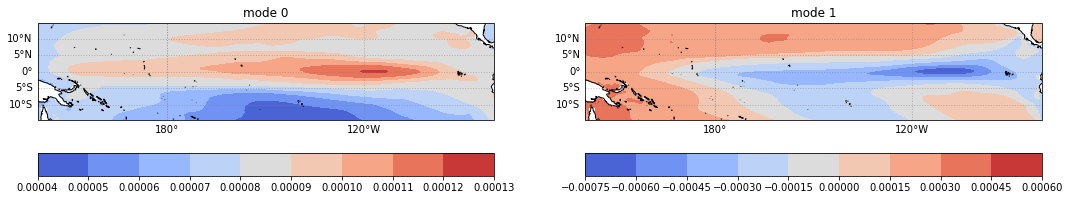

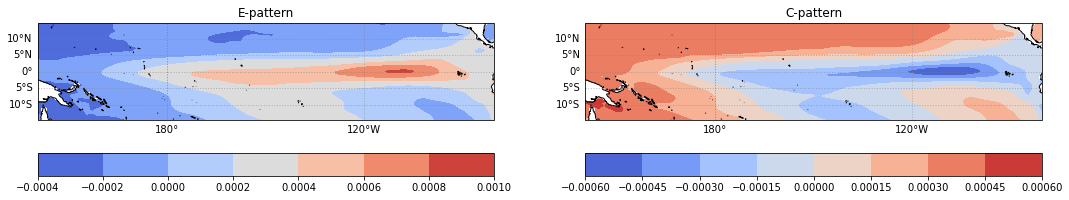

ACCESS-ESM1-5
[-1, -1]


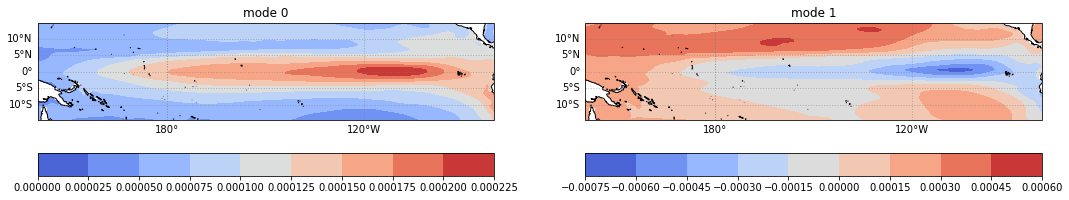

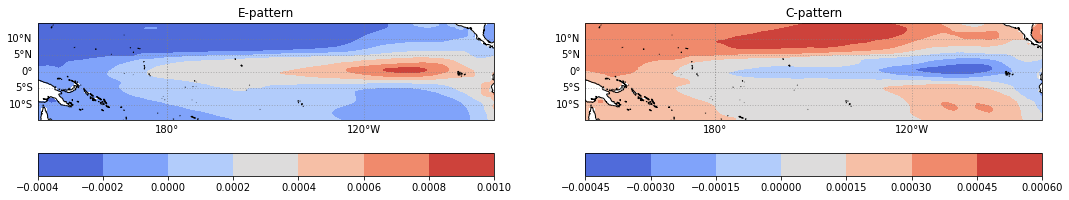

BCC-CSM2-MR
[1, 1]


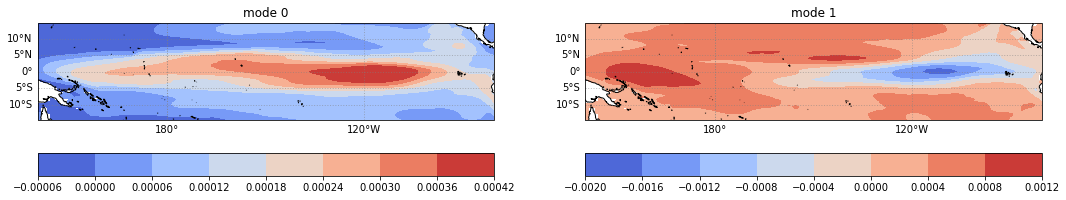

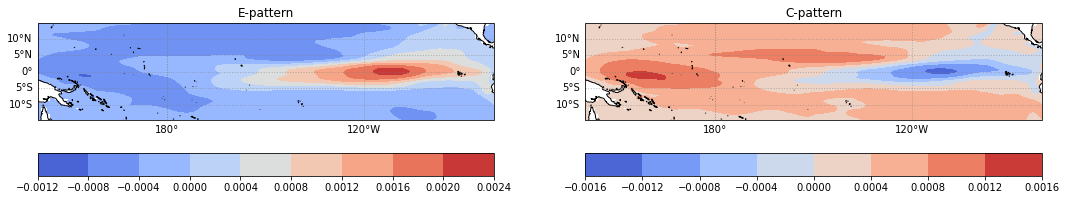

CAMS-CSM1-0
[1, -1]


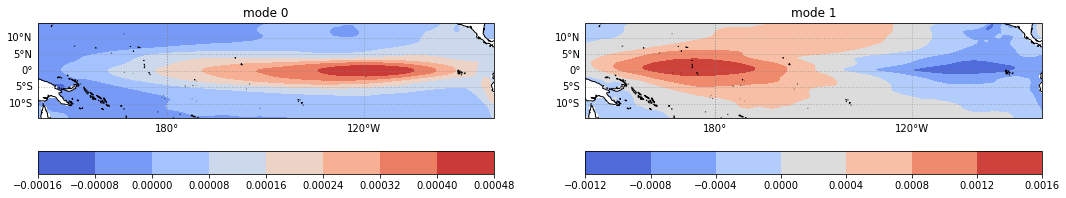

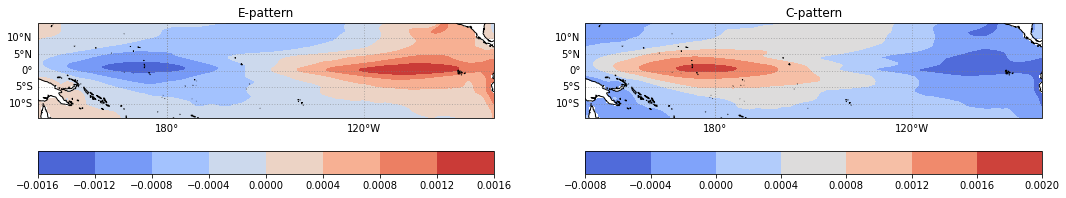

CAS-ESM2-0
[1, -1]


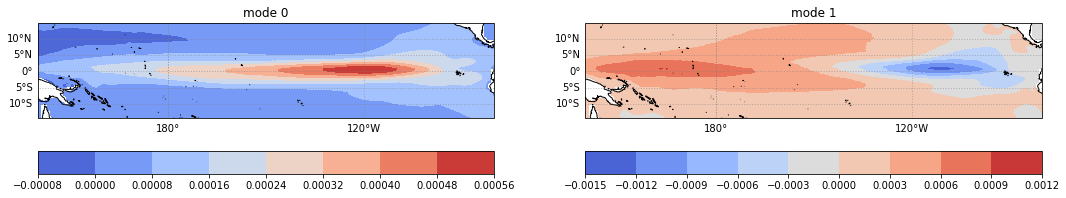

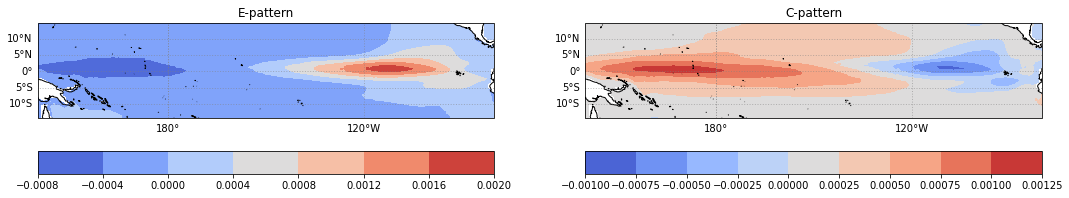

CESM2
[1, 1]


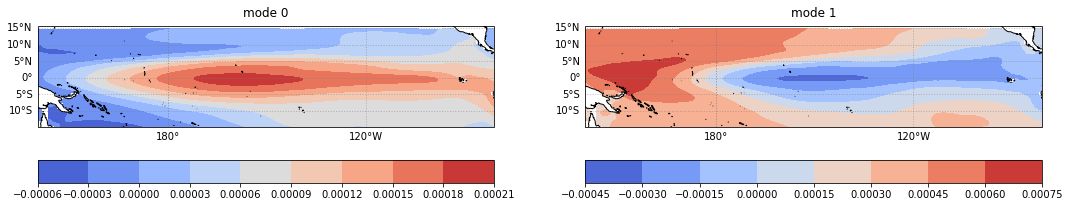

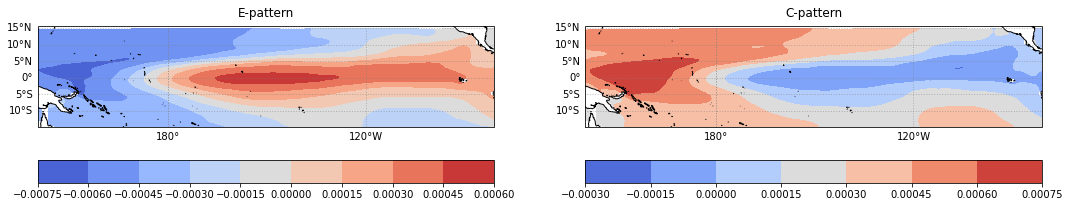

CESM2-WACCM
[1, 1]


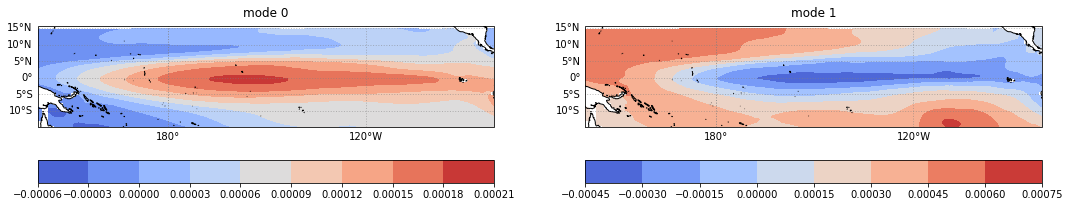

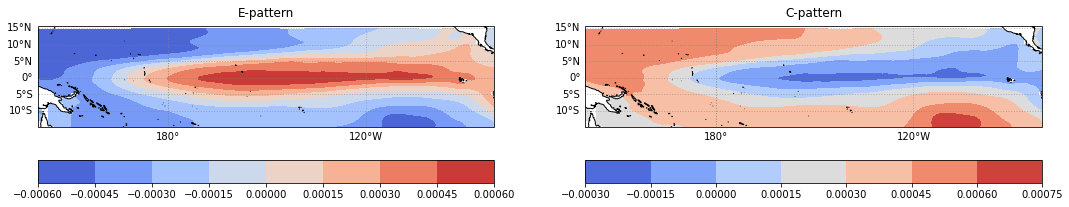

CIESM
[1, 1]


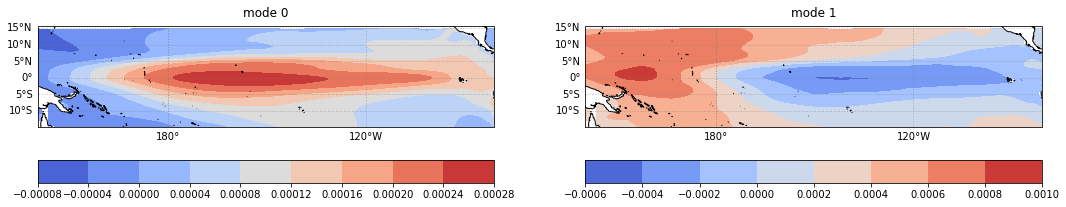

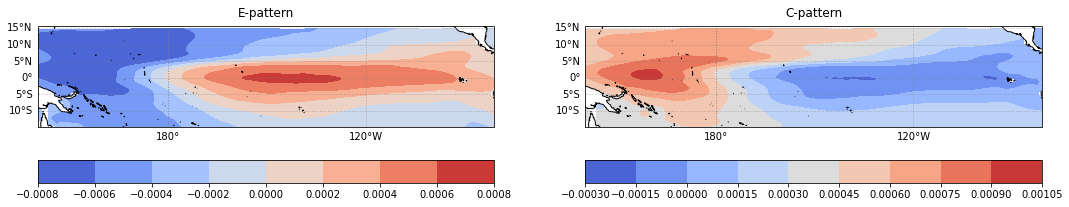

CMCC-CM2-SR5
[-1, 1]


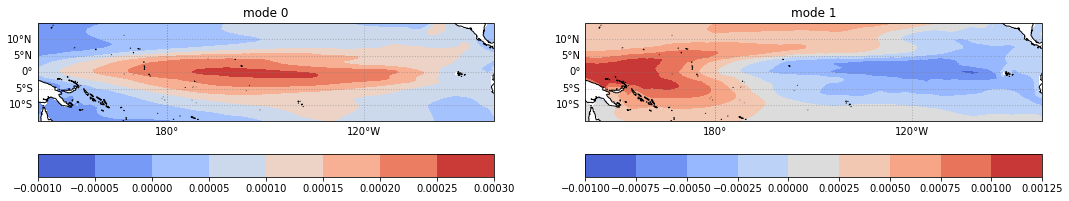

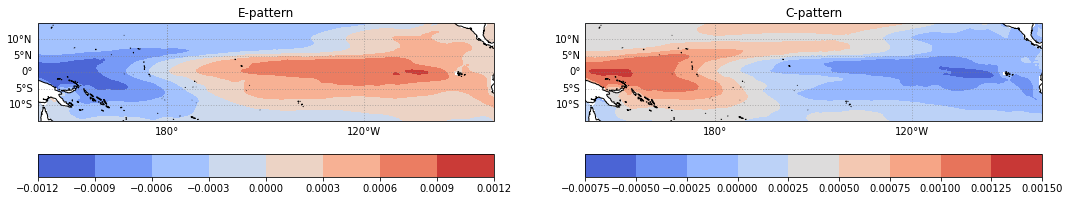

CMCC-ESM2
[-1, 1]


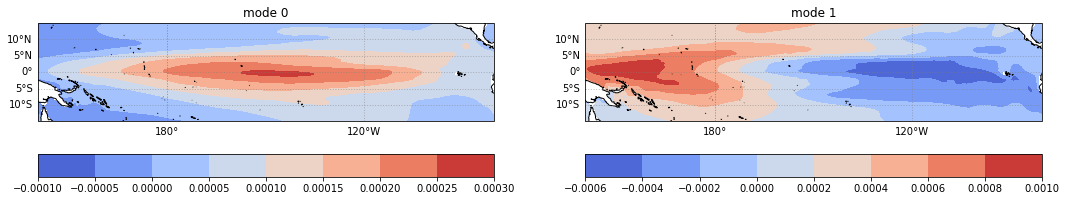

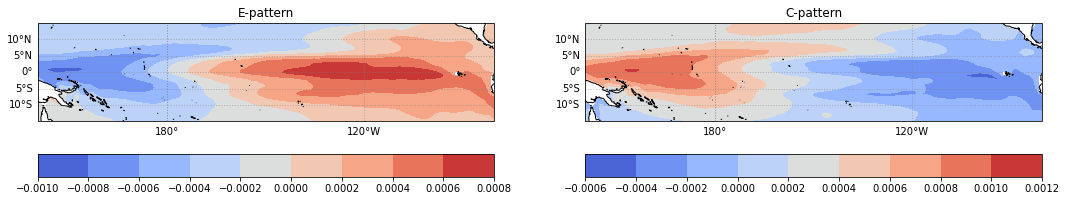

CNRM-CM6-1
[1, 1]


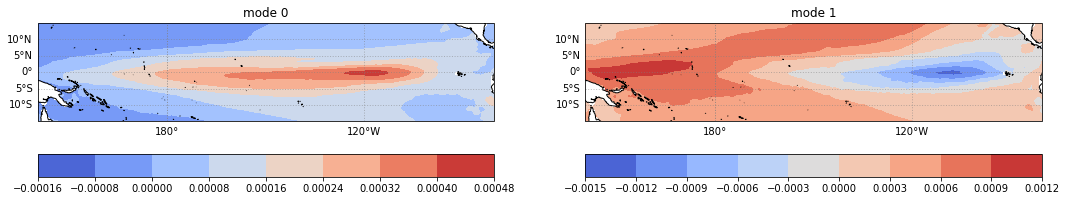

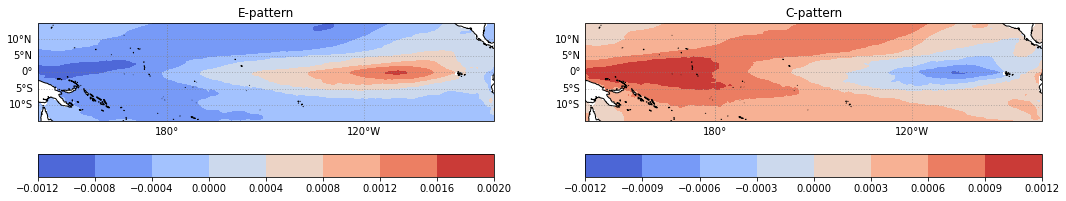

CNRM-ESM2-1
[-1, -1]


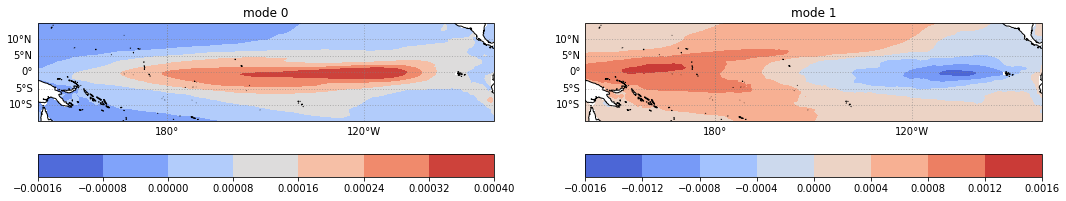

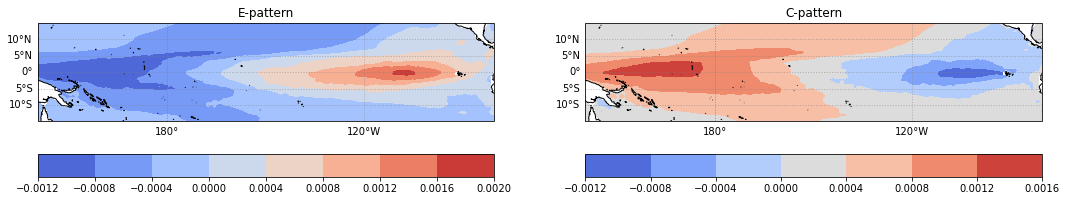

CanESM5
[1, 1]


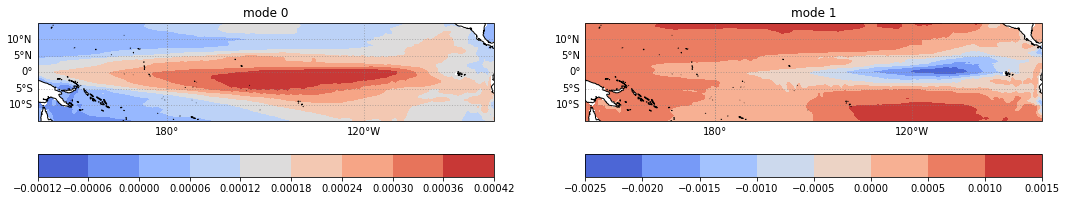

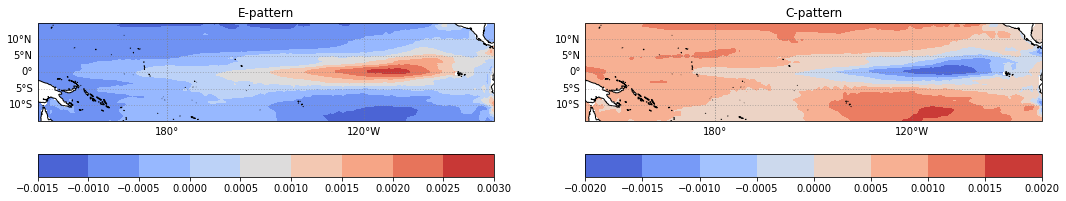

CanESM5-CanOE
[1, -1]


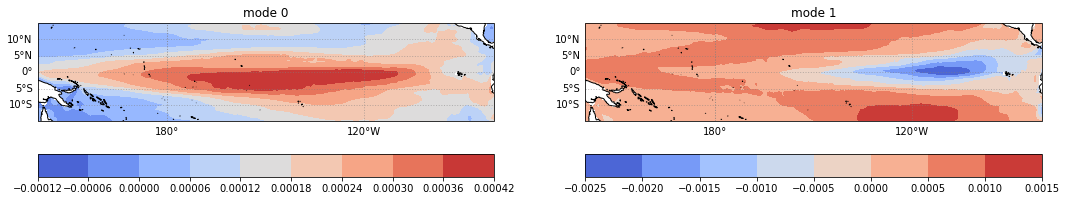

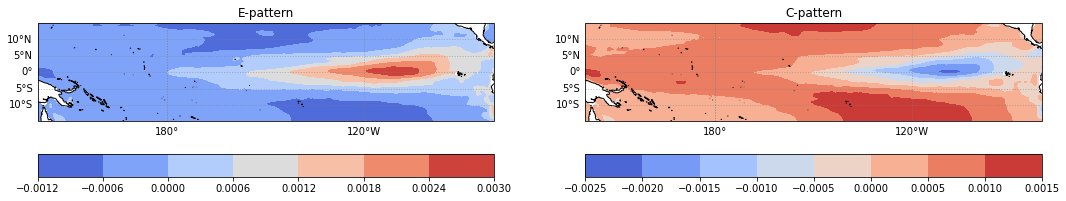

EC-Earth3
[1, -1]


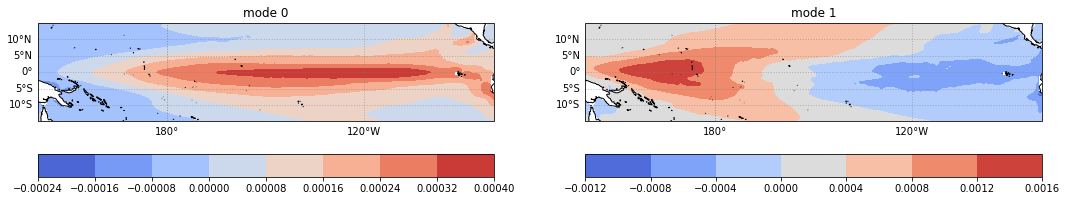

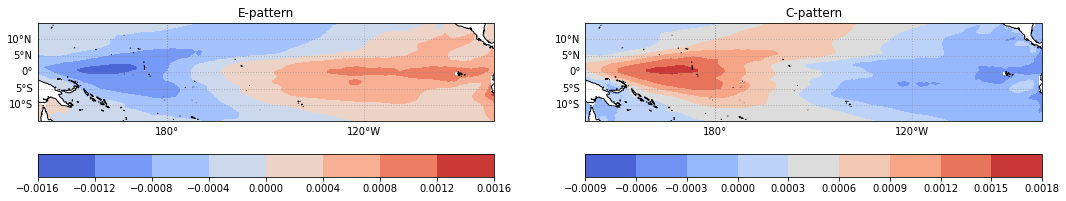

EC-Earth3-CC
[1, -1]


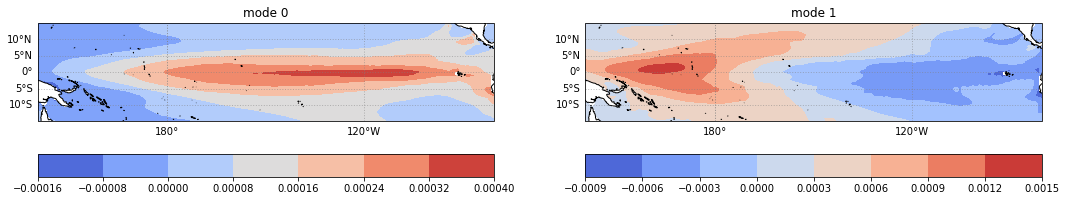

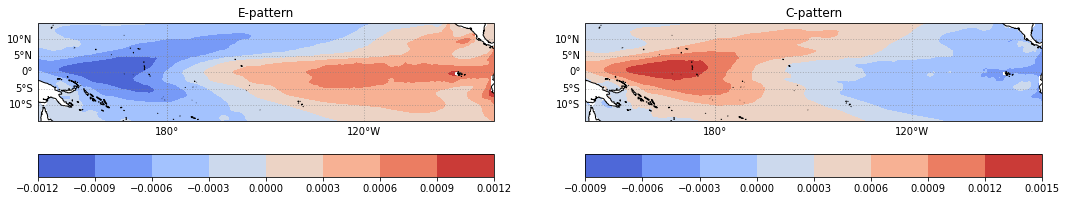

EC-Earth3-Veg
[1, 1]


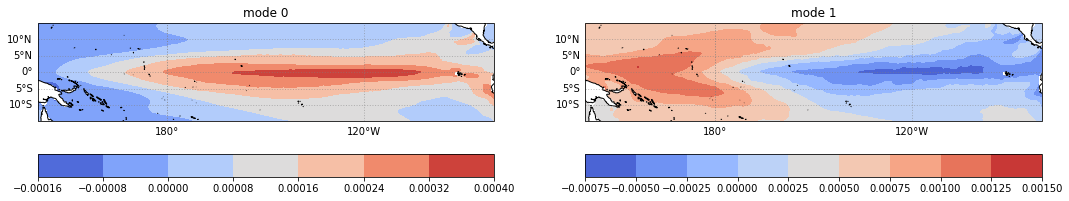

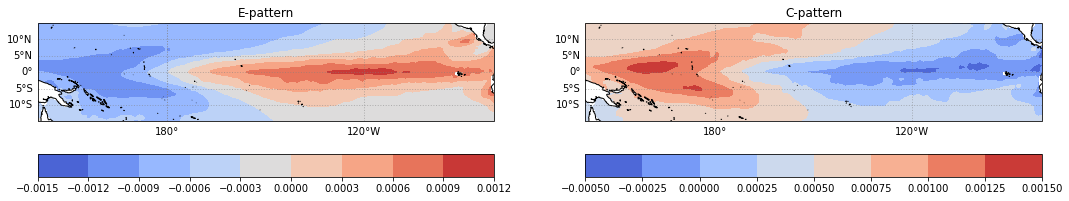

EC-Earth3-Veg-LR
[1, 1]


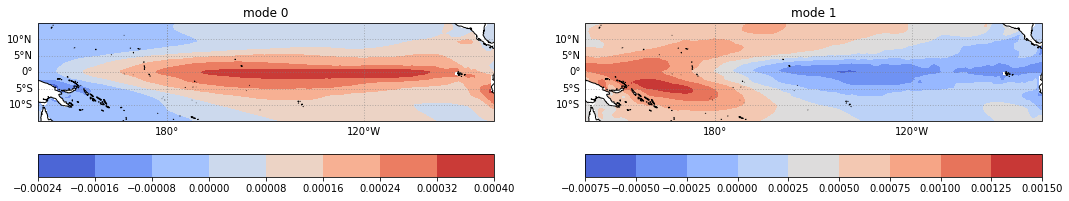

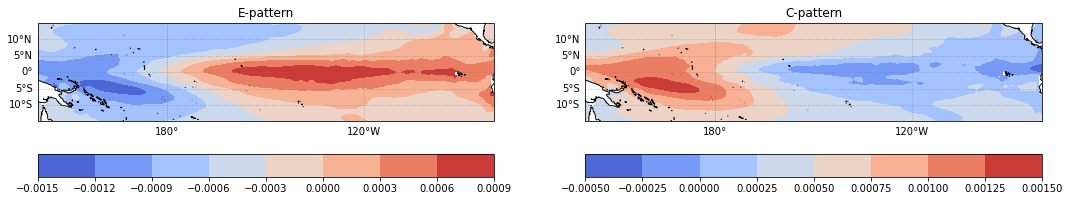

FIO-ESM-2-0
[1, -1]
'DataArray' object has no attribute 'lon'
GFDL-CM4
[1, -1]


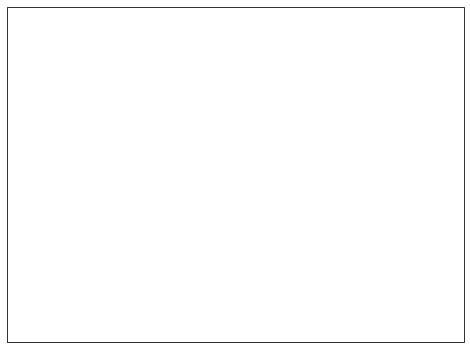

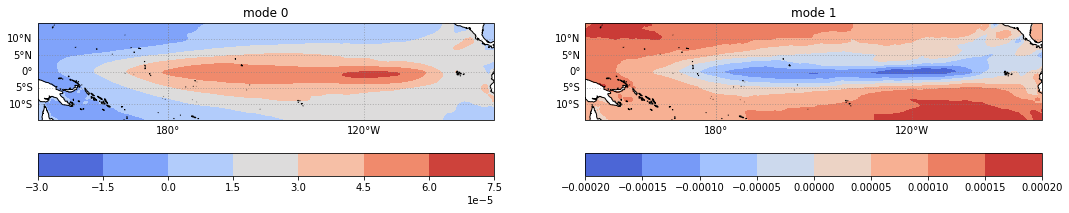

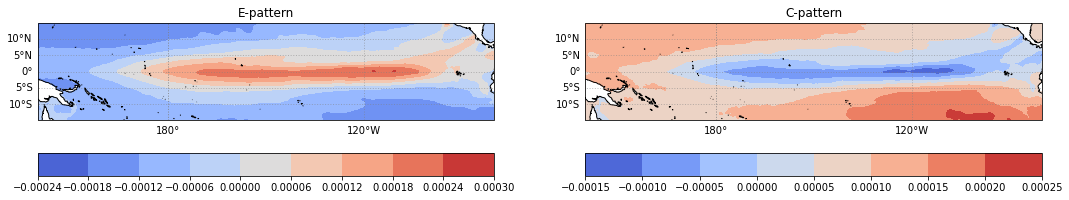

GFDL-ESM4
[1, 1]


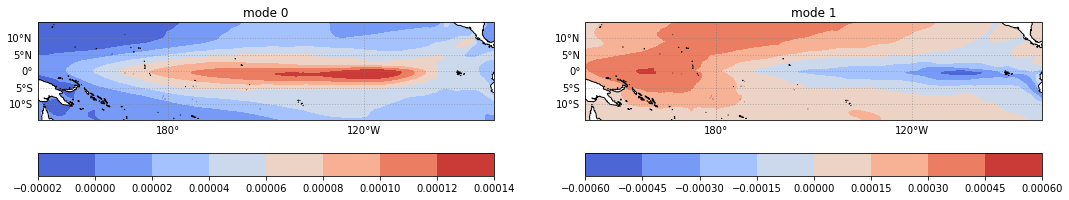

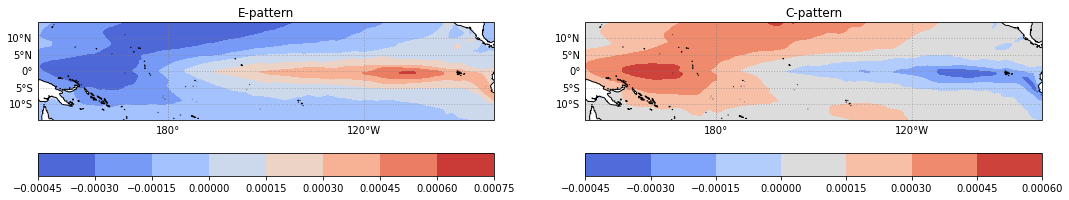

GISS-E2-1-G
[1, 1]


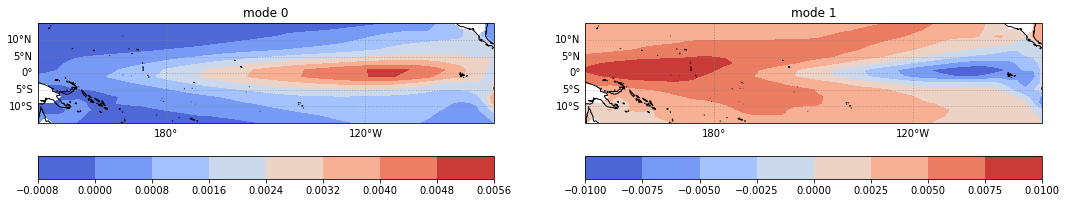

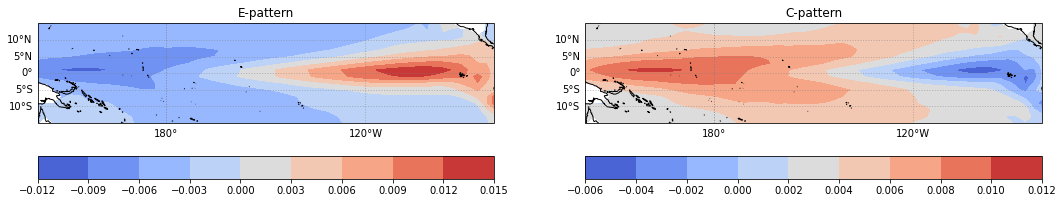

HadGEM3-GC31-LL
[1, 1]


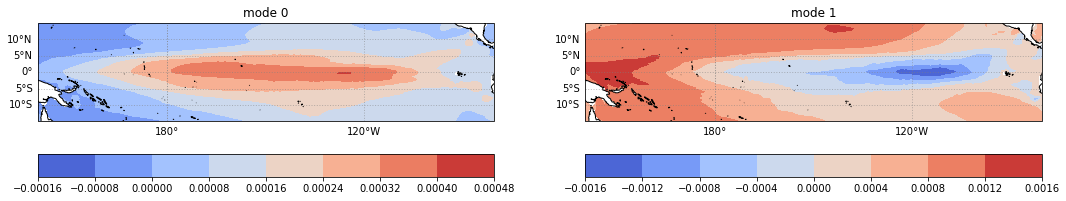

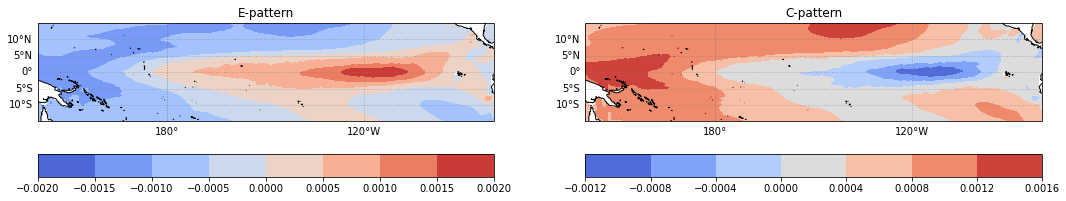

HadGEM3-GC31-MM
[1, 1]


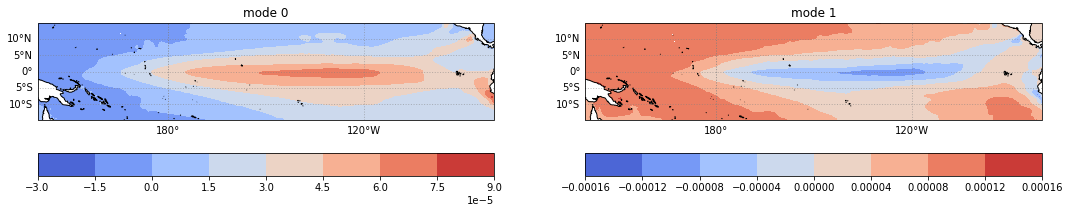

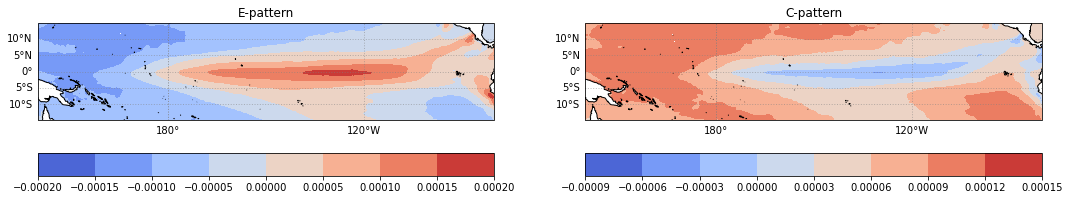

INM-CM4-8
[1, 1]


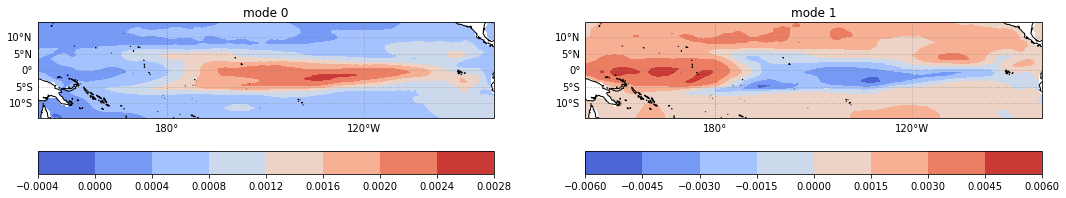

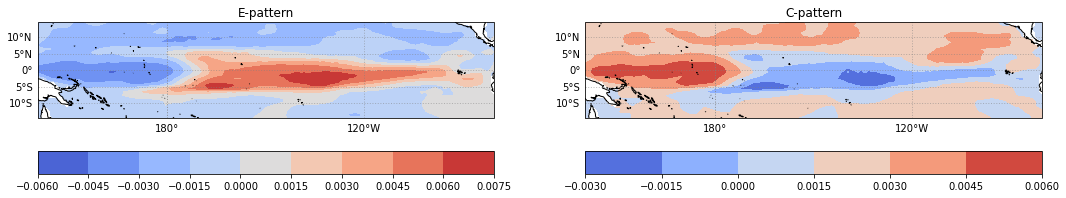

INM-CM5-0
[1, 1]


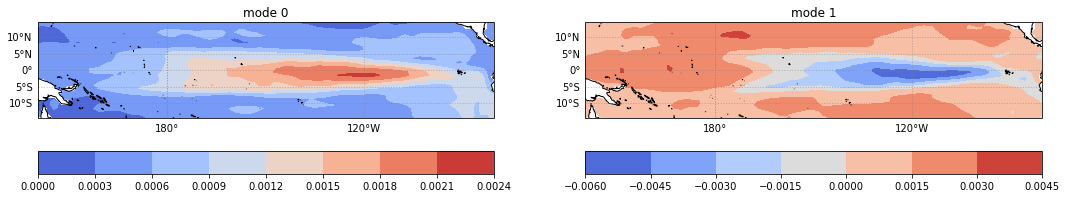

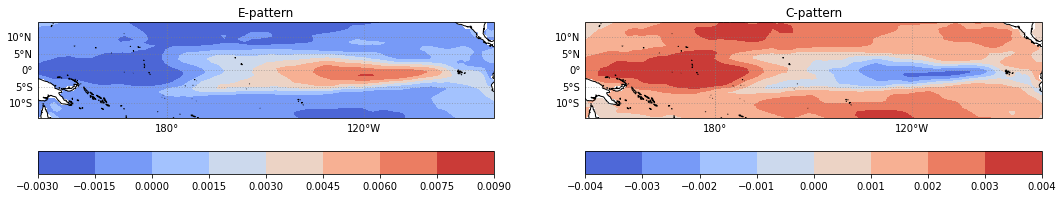

IPSL-CM6A-LR
[-1, -1]


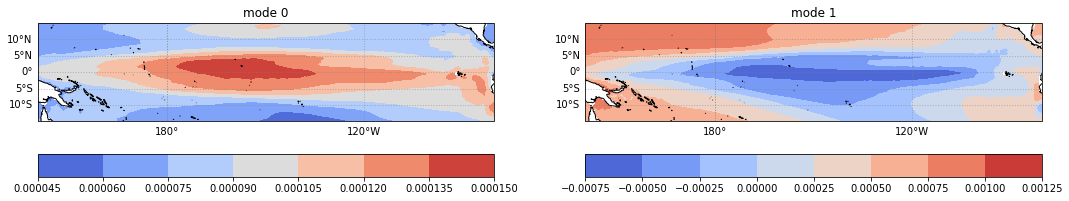

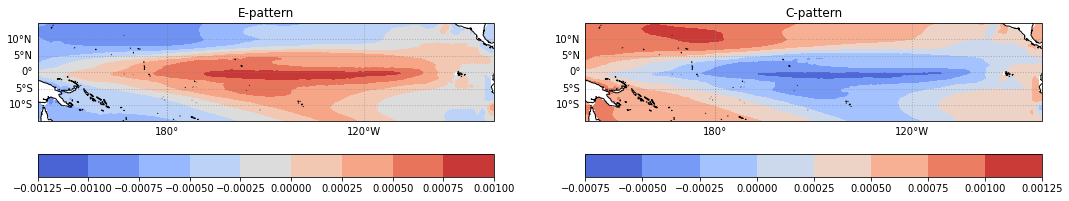

MCM-UA-1-0
[1, 1]


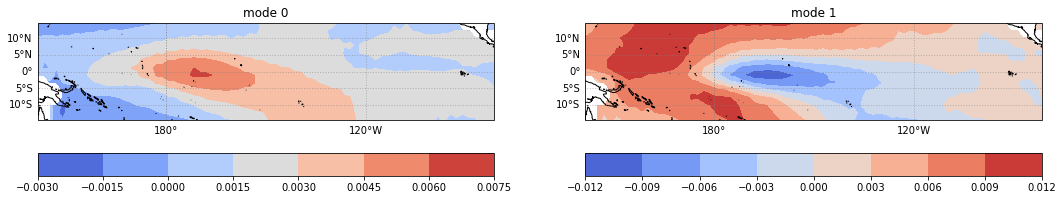

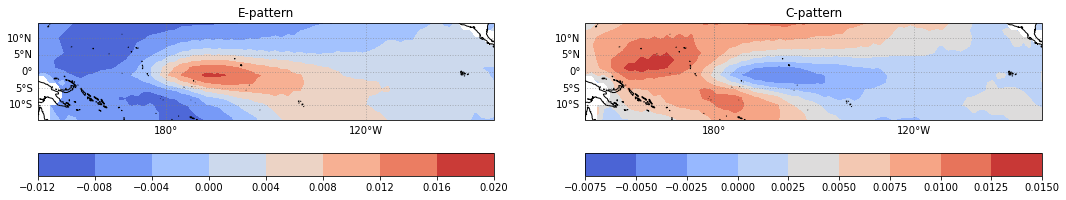

MIROC-ES2L
[-1, 1]


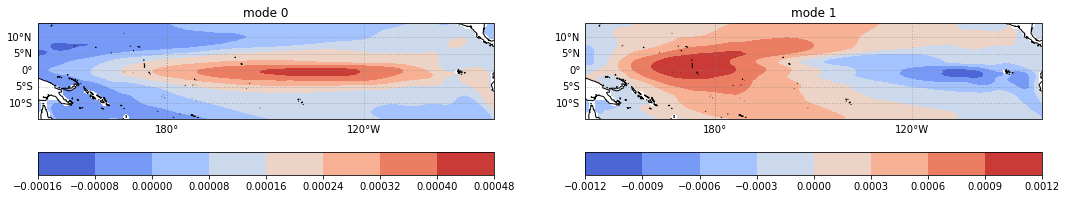

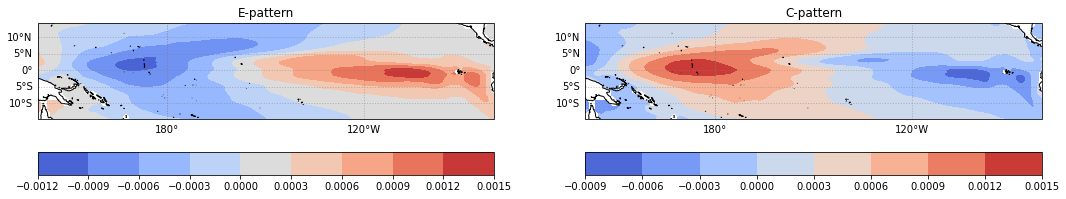

MIROC6
[1, 1]


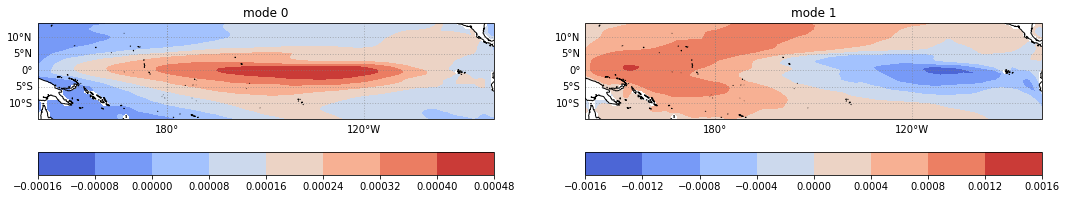

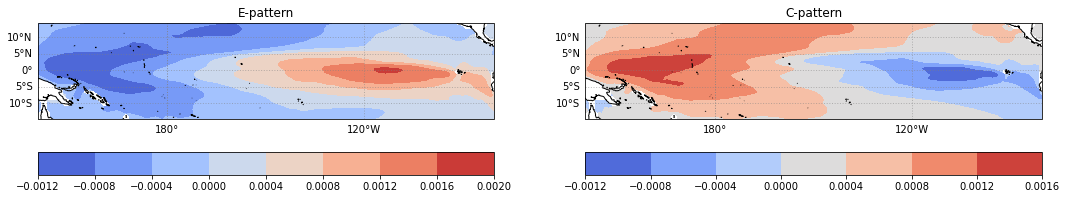

MPI-ESM1-2-HR
[1, -1]


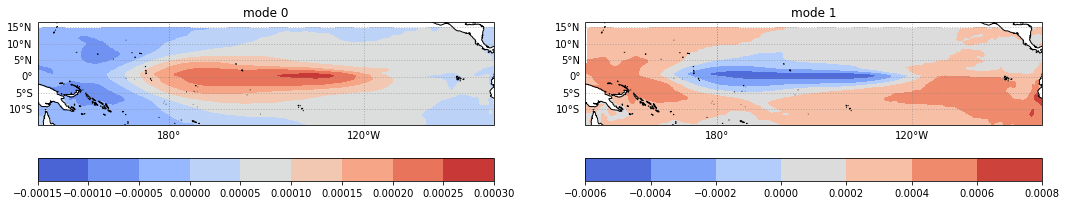

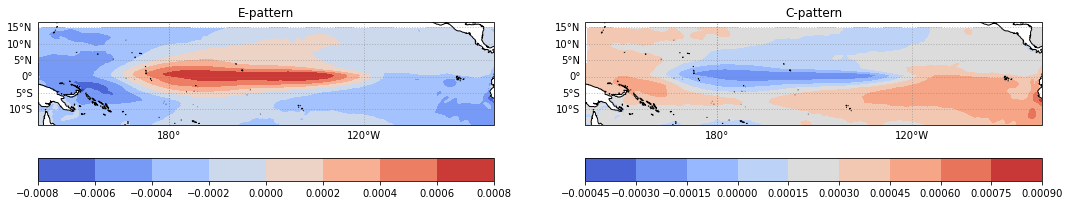

MPI-ESM1-2-LR
[1, -1]


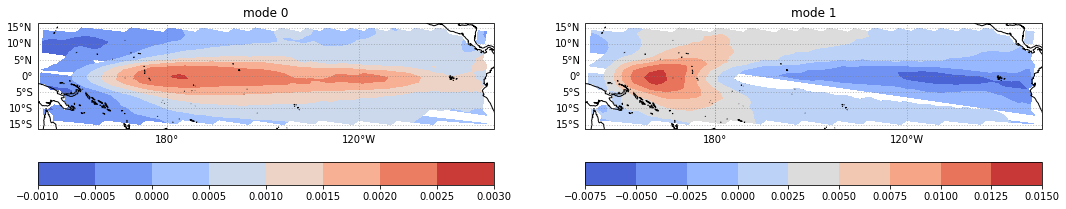

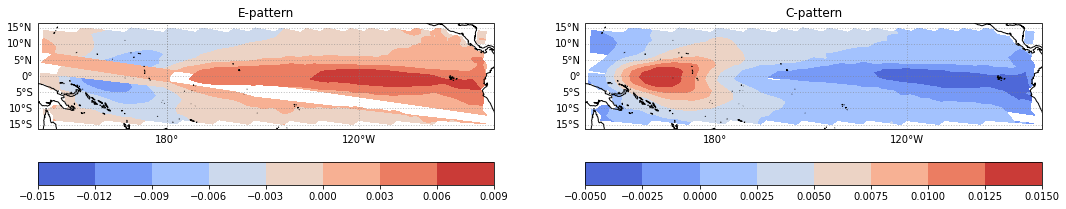

MRI-ESM2-0
[-1, -1]


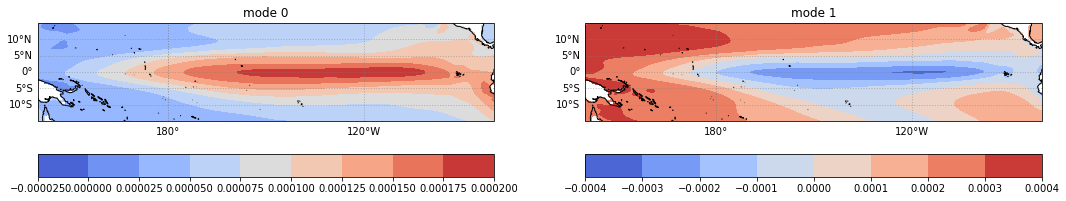

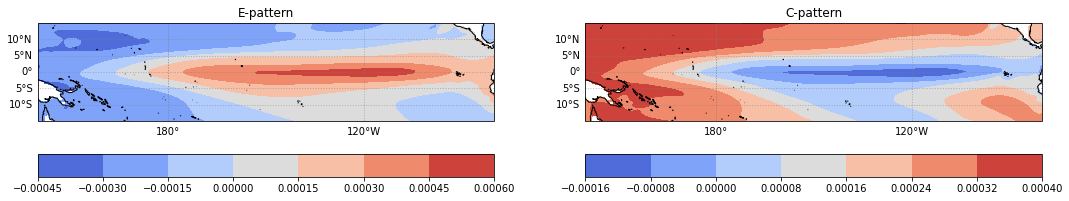

NESM3
[1, 1]


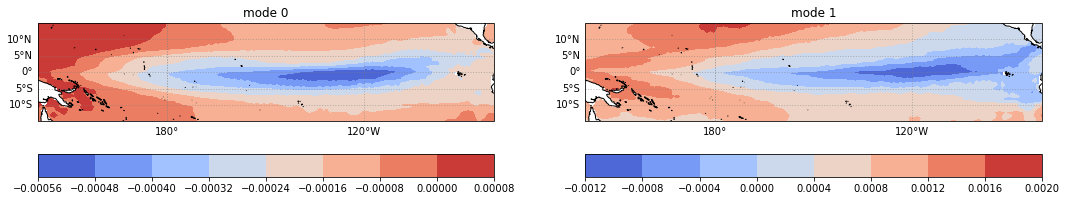

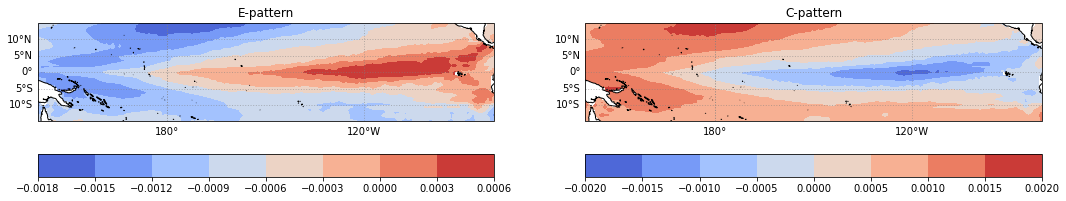

NorESM2-LM
[-1, -1]


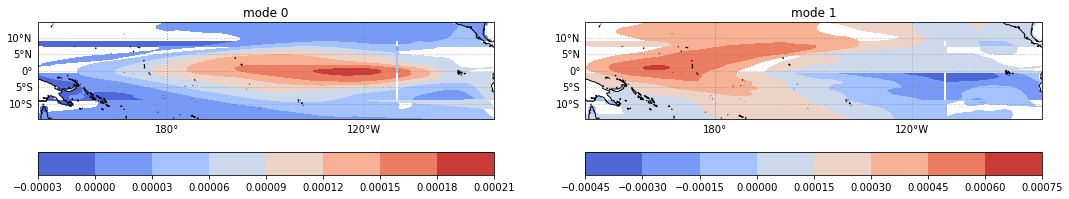

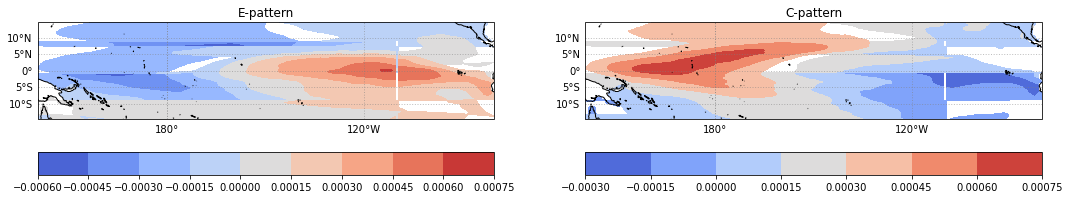

NorESM2-MM
[1, -1]


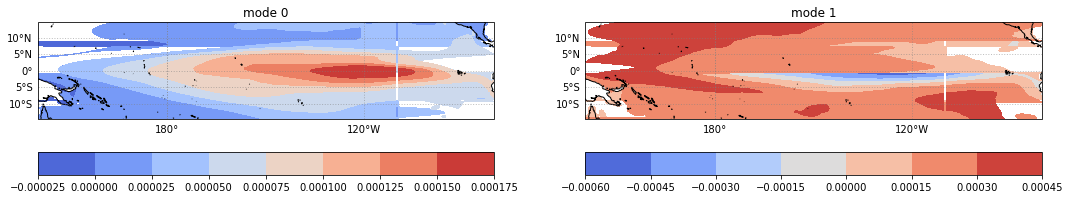

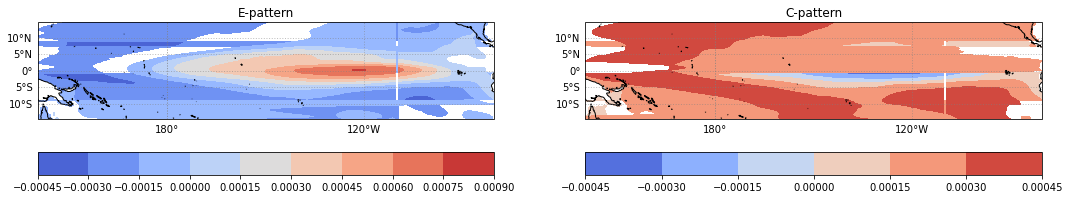

UKESM1-0-LL
[1, 1]


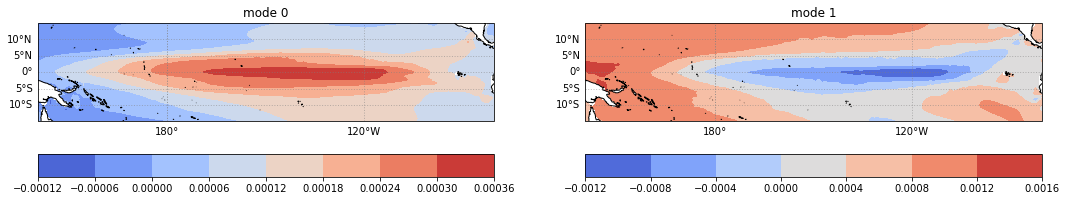

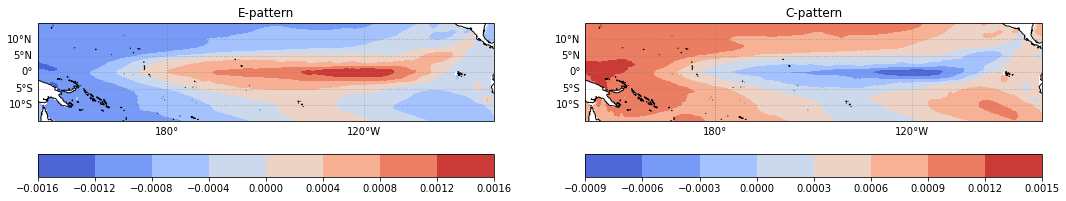

In [30]:
for iModel in modelSet:
    import numpy.polynomial as poly
    try:
        print(iModel[1])
        multiplyBy=multipliers[iModel[1]]
        print(multiplyBy)
        
        eofsXr=xarray.load_dataarray('results/ecIndex/eof'+str(iModel[1])+'.nc')
        
        fig=plt.figure(figsize=(18,12))
        
        for mode in [0,1]:
            ax=fig.add_subplot(1,2,mode+1,
                           projection=ccrs.Miller(central_longitude=210))

            ec.ensoPlotter(multiplyBy[mode]*eofsXr.sel(mode=mode), ax)

            plt.title("mode " + str(mode))

        plt.show()
        
        fig=plt.figure(figsize=(18,12))
        
        ax=fig.add_subplot(1,2,1,
                       projection=ccrs.Miller(central_longitude=210))

        ec.ensoPlotter(multiplyBy[0]*eofsXr.sel(mode=0)-multiplyBy[1]*eofsXr.sel(mode=1), ax)

        plt.title("E-pattern")

        ax=fig.add_subplot(1,2,2,
                       projection=ccrs.Miller(central_longitude=210))

        ec.ensoPlotter(multiplyBy[0]*eofsXr.sel(mode=0)+multiplyBy[1]*eofsXr.sel(mode=1), ax)

        plt.title("C-pattern")
        
        plt.show()
        
        

    except Exception as e:
        print(e)
    

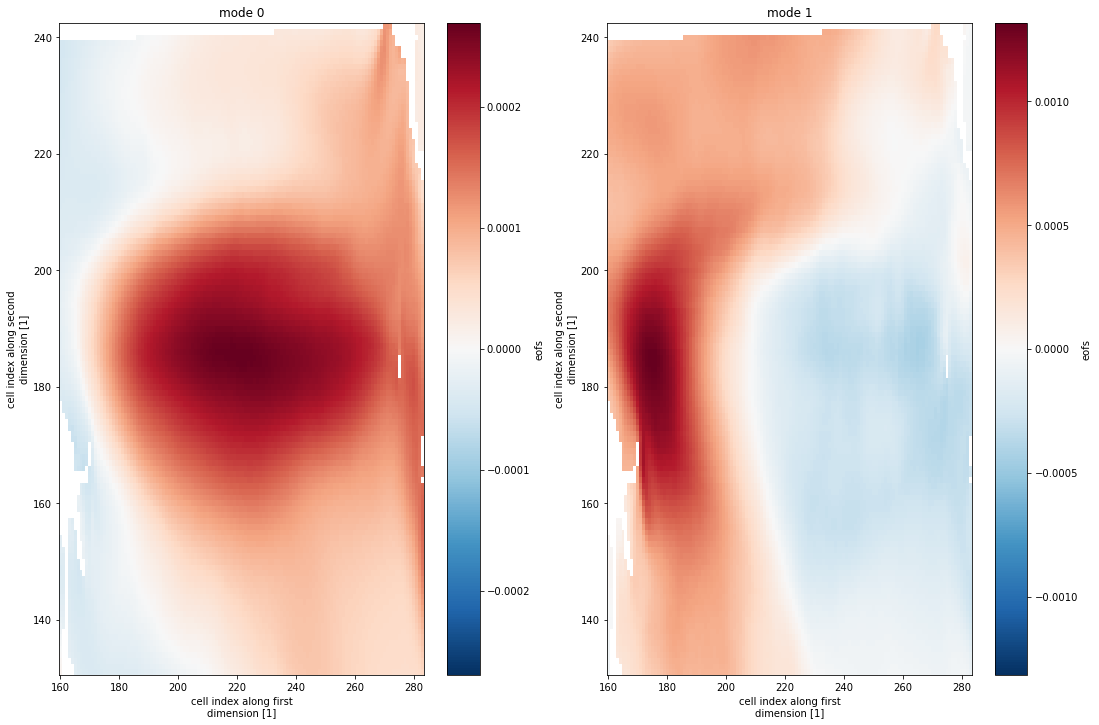

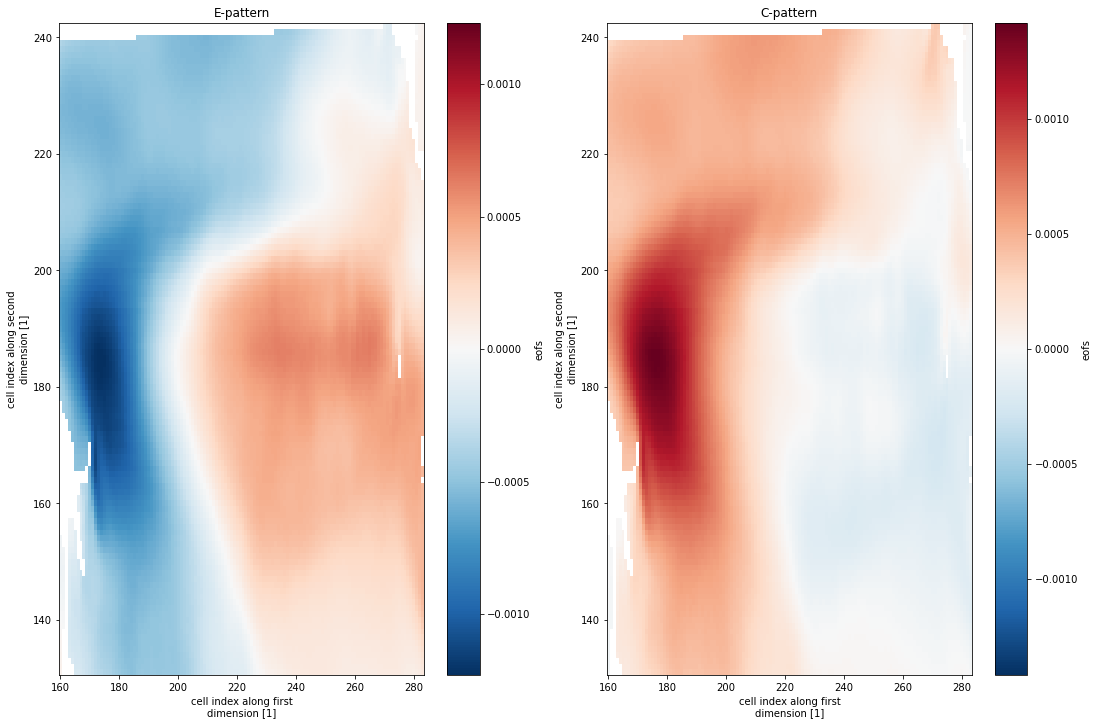

In [40]:
eofsXr=xarray.load_dataarray('results/ecIndex/eofFIO-ESM-2-0.nc')

multiplyBy=multipliers['FIO-ESM-2-0']

fig=plt.figure(figsize=(18,12))

for mode in [0,1]:
    ax=fig.add_subplot(1,2,mode+1)

    (multiplyBy[mode]*eofsXr.sel(mode=mode)).plot()

    plt.title("mode " + str(mode))

plt.show()

fig=plt.figure(figsize=(18,12))

ax=fig.add_subplot(1,2,1)

(multiplyBy[0]*eofsXr.sel(mode=0)-multiplyBy[1]*eofsXr.sel(mode=1)).plot()

plt.title("E-pattern")

ax=fig.add_subplot(1,2,2)

(multiplyBy[0]*eofsXr.sel(mode=0)+multiplyBy[1]*eofsXr.sel(mode=1)).plot()

plt.title("C-pattern")

plt.show()

# Do a warm season av

This grabs the monthly CESM indeces, and calculates the averages for the time periods of interest (aka the warm season), as set in the _indexDefitionions file

Theres a few examples of output at the bottom to sanity check this is meaningful

The indeces for each month have already been calculated. So loading up the saved versions, and putting them into a single xarray.

In [12]:
for experiment in experimentSet: 
    print(experiment)
    timePIndeces=list()

    for model in _model.scenarioMip[:,1]:
        try:
            indecesDs = xarray.open_dataset('results/cmipWarmSeasonIndeces/' + model +'tos'+ experiment + '.nc')
            indecesDs['model']=model
            timePIndeces.append(indecesDs)
        except Exception as e:
            print('skipping' + model + experiment) 
    results=xarray.concat(timePIndeces, 'model')

    results=results.assign_attrs({'experiment':experiment,**indecesDs.attrs,**_index.monthsOfInterest})

    results.to_netcdf('results/cmip6'+experiment+'TradIndecestos.nc')

piControl
skippingNorESM2-MMpiControl


KeyboardInterrupt: 

Some sanity checks to see if it looks ok:


In [ ]:
results=xarray.open_dataset('results/cmip6ssp585TradIndecestos.nc').sel(year=slice(1850,2099))

In [ ]:
str(results.isel(model=6).model.values)

In [ ]:
# plotSomething
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)

results.isel(model=5).nino34.plot(label='nino34')
results.isel(model=5).nino34NoDetrend.plot(label='No Detrend')

#Tidy up a bit
plt.title(str(results.isel(model=5).model.values) + " Historical Nino34")
plt.ylim(-4,4)
plt.minorticks_on()
plt.legend()

In [ ]:
# A multi-model mean?

mean = results.sam.mean(dim='model')
std = results.sam.std(dim='model')

In [ ]:
plt.figure()
mean.plot()
std.plot()

# 2. Calculate Compound Years for CESM6

# Define a criteria to determine events

So we are going to define events as follows:
- For SST indeces (aka Enso and Iod), this is 1 sigma above/below mean
- For PSL indeces (aka Sam) this is 0.5 sigma above/below mean

Using a piControl climatology

In [ ]:
piControlXr=xarray.open_dataset('results/cmip6piControlTradIndeces.nc')

piControlXr.model.values

In [ ]:
# This should calculate stds for all experiments and all indeces
stdXr = piControlXr.std(dim='year')

# define some criteria that we want to use to identifiy it thats an event
criteriaXr= xarray.merge(
    (stdXr[['nino34','dmi']], stdXr['sam']/2)
)

In [ ]:
criteriaXr

# Calculate the compounding years and plot an example

In [ ]:
for experiment in scenarioSet:

    # Here is the data
    indecesXr = xarray.open_dataset('results/cmip6'+experiment+'TradIndeces.nc')

    firePos, fireNeg = compound.applyCriteria(indecesXr, criteriaXr)

    firePos=compound.compound(firePos)

    fireNeg=compound.compound(fireNeg)

    firePos.to_netcdf('results/cmip6'+experiment+'FirePos.nc')

    fireNeg.to_netcdf('results/cmip6'+experiment+'FireNeg.nc')

In [ ]:
indecesXr.sel(year=2014)

In [ ]:
firePos

In [ ]:
modToPlot = 'CESM2'

toPlot=3*firePos.all3.sel(model=modToPlot)

plt.figure(figsize=(12,12))

plt.vlines(
    x=firePos.year, 
    ymin=0,
    ymax=toPlot,
    label='all3'
)

colors=['orange', 'purple', 'green']
iCol = 0

for iPair in firePos.attrs['pairs']:
    plt.vlines(
        x=firePos.year, 
        ymin=0,
        ymax=2*firePos[iPair].sel(model=modToPlot),
        color=colors[iCol],
        label=iPair
    )
    iCol+=1
plt.legend()
plt.xlim(1850,2100)
plt.title(modToPlot+': Pairs and all-three compounds for individal years')